In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.webdriver.common.action_chains import ActionChains

print('finish importing package')

finish importing package


TASK 1

In [3]:
#Step 1: Login to LinkedIn

#Open Edge and Login Linkedin login site

driver = webdriver.Edge()
url = "https://www.linkedin.com/login"
driver.get(url)
sleep(2)

In [4]:
credential = open('login_credential.txt')
line = credential.readlines()
username = line[0]
password = line[1]
sleep(3)

In [5]:
email_field = driver.find_element(By.ID, 'username')
email_field.send_keys(username)
sleep(2)

In [6]:
password_field = driver.find_element(By.NAME, 'session_password')

# Perform actions on the element
password_field.send_keys(password)
sleep(3)


In [7]:
login_field = driver.find_element(By.XPATH, '//*[@id="organic-div"]/form/div[3]/button')

# Perform actions on the element
login_field.click()



When running automated login programs, there is a risk of having the account flagged as suspicious or potentially associated with scams. To mitigate this risk, it is advisable to increase the time interval between each login attempt. By incorporating longer delays, the login process appears more natural and reduces the likelihood of triggering security measures.

To avoid those situations where your account is being banned or the program would be interrupted, we will import module time and import function sleep() in module time. 

Time.sleep() function helps slow down the execution from our script for a given number of seconds.

DONE TASK 1

TASK 2

In [15]:
#Step2: Search for the profile we want to crawl 

#Locate the search bar element 

#Input the search query to search bar 

#Searh 

locate the search bar element by using inspect html again to find the id or xpath 

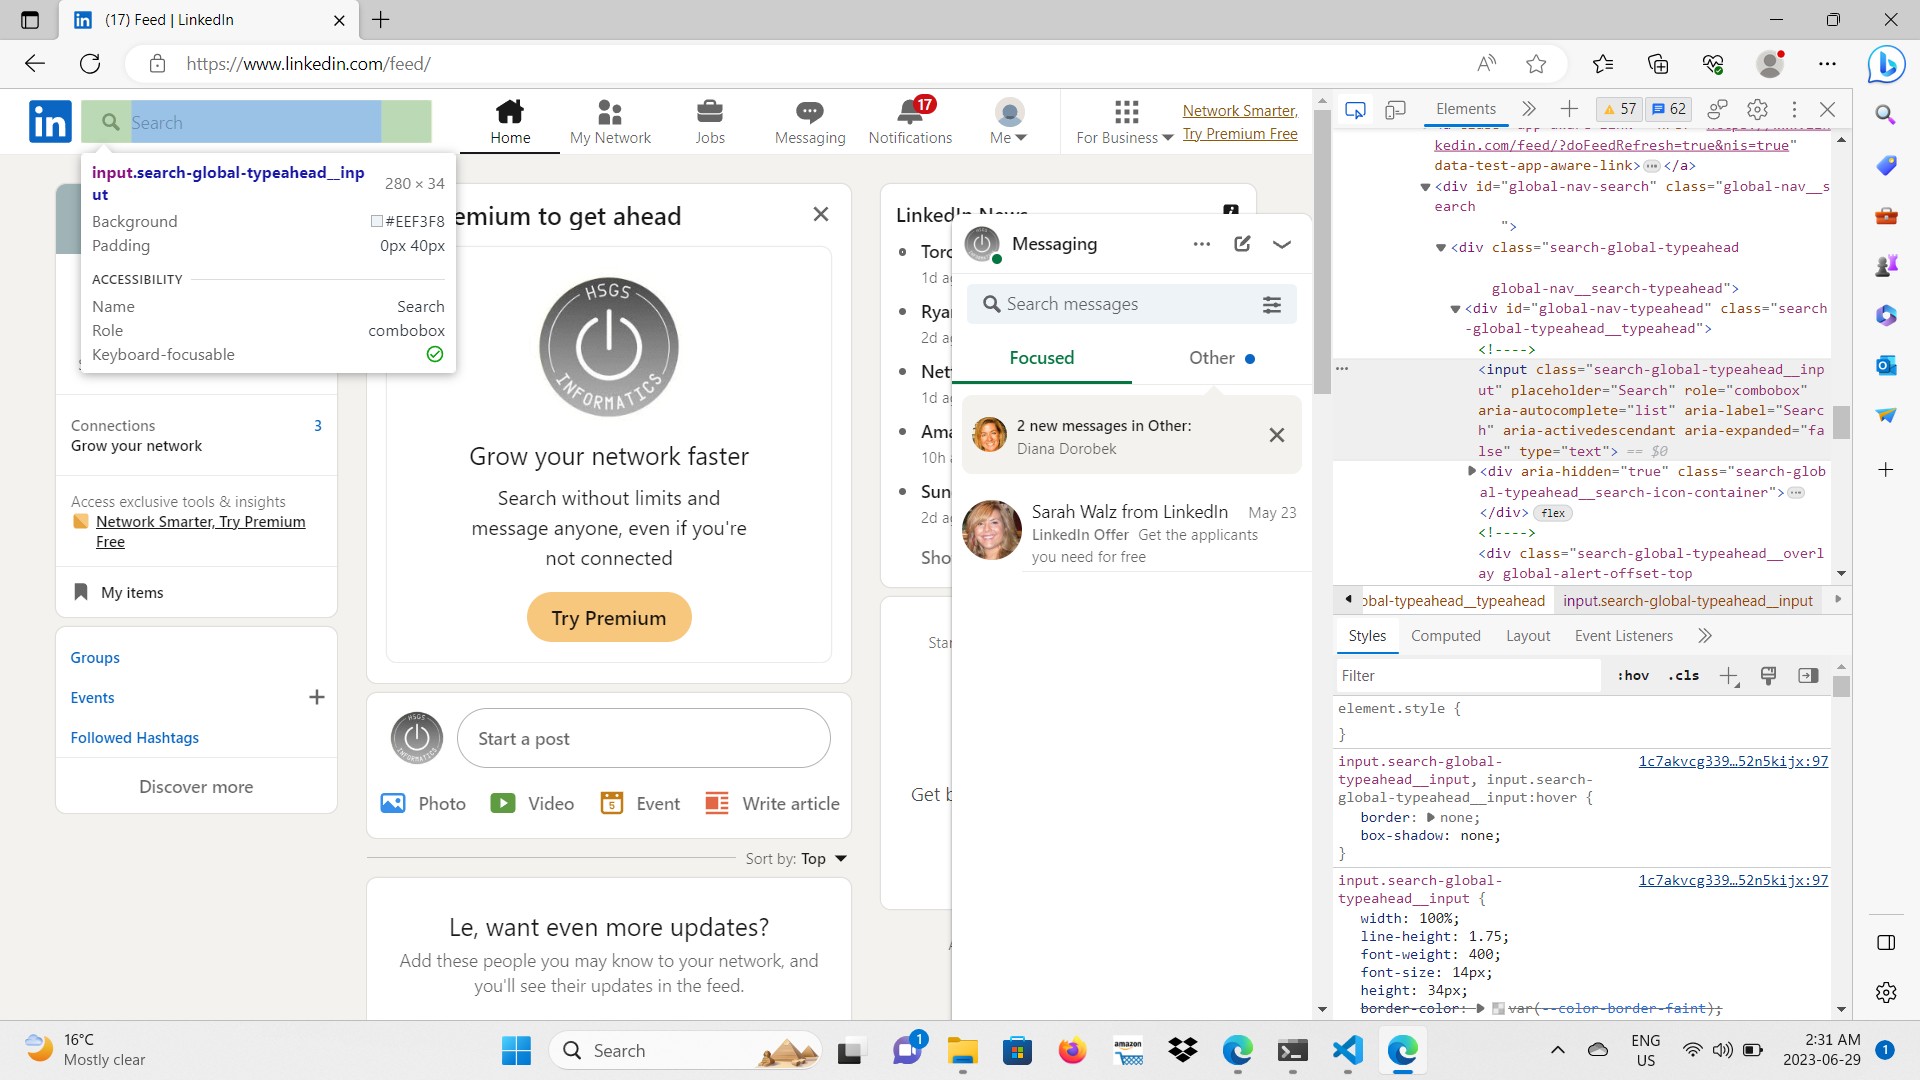



In [8]:
#locate the search bar element 

search_field = WebDriverWait(driver, 3).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="global-nav-typeahead"]/input'))
)

# Input the search query to the search bar
search_field.send_keys('Software Engineer people')
# search
search_field.send_keys(Keys.RETURN)


In [17]:
#the act of pass the exacr key word to the funtion is not optimal. In case of when we need to reuse the program for different keywords, we might have to change the code again.
# to avoid that situation, we can code the program to pause in order to ask which keywords we want to type in 


# search_field = WebDriverWait(driver, 10).until(
#     EC.element_to_be_clickable((By.XPATH, '//*[@id="global-nav-typeahead"]/input'))
# )

# search_query = input("what profile do you want to scrape?")

# # Input the search query to the search bar
# search_field.send_keys(search_query)
# # search
# search_field.send_keys(Keys.RETURN)

DONE TASK 2 WHICH IS SEARCHING FOR PROFILE THAT WE WANT TO CRAWL 

TASK 3: OPEN THE URLS OF THE PROFILES(using BeautifulSoup4)

BeautifulSoup is a Python library for pulling data out of HTMl files, which is the file that stores the content of website 

To be specific in this use case, we use beautifulsoup to pull out all of the URLs of each profile that appears on the first page, and then move to the next few page to keep collecting data from those new URLs.

In [18]:
#Step 3: Scrape the URLs of the profiles

def GetURL():
    page_source = BeautifulSoup(driver.page_source)
    profiles = page_source.find_all('a', class_ = 'app-aware-link')
    #_class instead of class because class already in Python library
    all_profile_URL = []
    for profile in profiles:
        profile_ID = profile.get('href')
        profile_URL = profile_ID
        if profile_URL not in all_profile_URL:
            all_profile_URL.append(profile_URL)
    return all_profile_URL

print(GetURL())

['https://www.linkedin.com/feed/?nis=true', 'https://www.linkedin.com/feed/?nis=true&', 'https://www.linkedin.com/mynetwork/?', 'https://www.linkedin.com/jobs/?', 'https://www.linkedin.com/messaging/?', 'https://www.linkedin.com/notifications/?']


Stop at 19:32

In [21]:
# Task 3.2: Navigate through many page, and extract the profile URLs of each page


def GetURLsonPages():
    input_page = int(input('How many pages you want to scrape: '))
    URLs_all_page = []
    for page in range(input_page):
        URLs_one_page = GetURL()
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        next_button = driver.find_element(By.CLASS_NAME,"artdeco-pagination__button--next")

        driver.execute_script("arguments[0].click();", next_button)
        filtered_urls = [url for url in URLs_one_page if 'https://www.linkedin.com/in/' in url]
        
        URLs_all_page += filtered_urls
        sleep(2)
    return URLs_all_page

print(GetURLsonPages())



['https://www.linkedin.com/in/xinyuan-wang-9aa2aa133?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAACCc-xIBPk0mEgmyy8aO-STn6WPA2Cl3j7A', 'https://www.linkedin.com/in/mohammadirfanghani?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAABWgq1YBZlIatu2OOVqhIvMxRrv-CuKs4UA']


In [44]:
#Task 4: Scrape the data of 1 Linkedin profile and write the data to a .CSV file 
import csv 

with open('output.csv', 'w',  newline = '') as file_output:
    headers = ['Name', 'Job Title', 'Location', 'URL']
    writer = csv.DictWriter(file_output, delimiter=',', lineterminator='\n',fieldnames=headers)
    writer.writeheader()
    URLs_all_page = GetURLsonPages()
    for linkedin_URL in URLs_all_page:
        driver.get(linkedin_URL)
        print('- Accessing profile: ', linkedin_URL)

        page_source = BeautifulSoup(driver.page_source)

        info_div = page_source.find('div',{'class':'mt2 relative'})
        name = info_div.find('h1').get_text().strip() #Remove unnecessary characters 
        print('--- Profile name is: ', name)
        title = info_div.find('div',{'class':'text-body-medium break-words'}).get_text().strip() #Remove unnecessary characters 
        print('--- Profile title is: ', title)
        location = info_div.find('div',{'class':'pv-text-details__left-panel mt2'}).get_text().strip()
        print('--- Profile location is: ', location)
        writer.writerow({headers[0]:name, headers[1]:location, headers[2]:title, headers[3]:linkedin_URL})
        print('\n')

print('Mission Completed!')

- Accessing profile:  https://www.linkedin.com/in/xinyuan-wang-9aa2aa133?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAACCc-xIBPk0mEgmyy8aO-STn6WPA2Cl3j7A
--- Profile name is:  Xinyuan Wang
--- Profile title is:  Software Engineer at Amazon
--- Profile location is:  Richmond, British Columbia, Canada
    


          Contact info


- Accessing profile:  https://www.linkedin.com/in/mohammadirfanghani?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAABWgq1YBZlIatu2OOVqhIvMxRrv-CuKs4UA
--- Profile name is:  Mohammad I.
--- Profile title is:  Software Engineer
--- Profile location is:  Canada
    


          Contact info


Mission Completed!
